In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.datasets import fetch_openml
from sklearn import preprocessing
import pandas as pd
import numpy as np
import sklearn
import warnings
warnings.filterwarnings('ignore')
import os
import sys

parent_directory = os.path.abspath('..')
sys.path.append(parent_directory)
from taelcore import taelcore


from matplotlib import pyplot as plt
plt.rc('figure', max_open_warning = 0)

In [2]:
x,target=fetch_openml('shapes',return_X_y=True)
x=x.to_numpy()
y=x[:,-1]
x=x[:,:3]
x=x.astype(np.float64)
x.shape,y.shape

((16000, 3), (16000,))

In [3]:
np.unique(y).shape


(40,)

In [4]:

enc = preprocessing.OrdinalEncoder(categories='auto')

y=enc.fit_transform(y.reshape(-1,1))

In [5]:
from sklearn.model_selection import train_test_split
data_train,data_test,y_train,y_test = train_test_split(x,y ,random_state=89)

dataset=[(x,y) for x,y in zip(data_train,y_train)]
data_set=[(x,y) for x,y in zip(data_test,y_test)]

train_loader=DataLoader(dataset, batch_size=300, shuffle=True)
test_loader=DataLoader(data_set,batch_size=25,shuffle=True)

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [9]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(3, 2)
            
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 3)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
model = Model().to(device)
model=model.double()
learning_rate = 0.001

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate
)

mse=nn.MSELoss()

In [10]:
m,loss_data = taelcore(model, train_loader,50,mse,optimizer,device)

Epoch 1/50, Loss: 1.7083827597952412
Epoch 2/50, Loss: 1.6891948544570898
Epoch 3/50, Loss: 1.6673019713048634
Epoch 4/50, Loss: 1.6425252257939649
Epoch 5/50, Loss: 1.6145802673581353
Epoch 6/50, Loss: 1.583722215172721
Epoch 7/50, Loss: 1.549846890700526
Epoch 8/50, Loss: 1.5132536672984798
Epoch 9/50, Loss: 1.474123805539984
Epoch 10/50, Loss: 1.432630123764823
Epoch 11/50, Loss: 1.389199599744922
Epoch 12/50, Loss: 1.3439755403114326
Epoch 13/50, Loss: 1.2973800656386048
Epoch 14/50, Loss: 1.2497149031166328
Epoch 15/50, Loss: 1.2014009099685832
Epoch 16/50, Loss: 1.1525835952053092
Epoch 17/50, Loss: 1.1037909105550208
Epoch 18/50, Loss: 1.0553213708681803
Epoch 19/50, Loss: 1.0074937351964734
Epoch 20/50, Loss: 0.9603751933748822
Epoch 21/50, Loss: 0.9146773805490541
Epoch 22/50, Loss: 0.870297063677434
Epoch 23/50, Loss: 0.8275707351114419
Epoch 24/50, Loss: 0.7868930990212119
Epoch 25/50, Loss: 0.7480278070268905
Epoch 26/50, Loss: 0.7116615098247643
Epoch 27/50, Loss: 0.677316

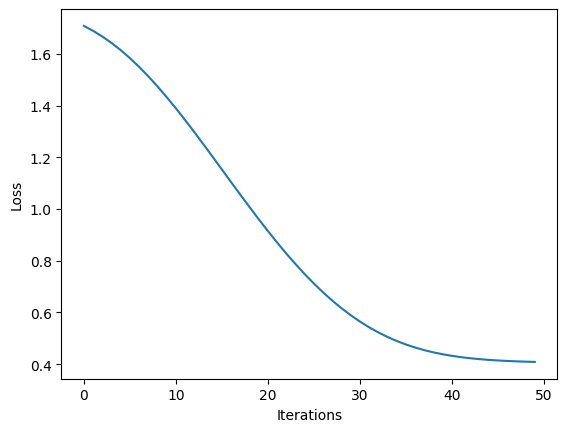

In [11]:
plt.plot(loss_data[:])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# visualising loss